# SocialEvolution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/home/lozeve/.local/share/virtualenvs/tda-networks--KypeAmE/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/lozeve/.local/share/virtualenvs/tda-networks--KypeAmE/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
import igraph as ig
import dionysus as d

In [3]:
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = 10, 6

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import pickle

In [6]:
d.__version__

'2.0.7.dev0'

## Data import

In [59]:
g = ig.read("data/realitycommons/SocialEvolution/Proximity.graphml")

In [60]:
g.es["time"] = pd.to_datetime(g.es["time"]).astype(np.int64) // 10**9

In [61]:
g.to_undirected(mode="each")

In [62]:
g.summary()

'IGRAPH U--- 81 2124564 -- \n+ attr: id (v), id (e), prob2 (e), time (e)'

In [63]:
times = np.unique(g.es["time"])
(times.min(), times.max())

(1189000931, 1247769643)

## Temporal partitioning

In [64]:
from zigzag import *

In [74]:
wins = sliding_windows(g, 0.2)

## Zigzag persistence

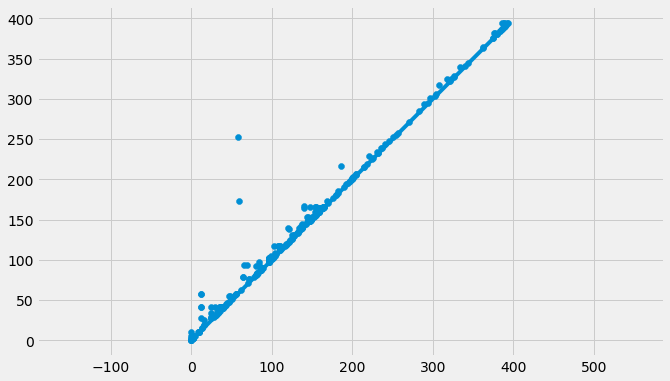

In [73]:
for w in wins[0:1]:
    (f, t) = presence_times(w)
    zz, dgms, cells = d.zigzag_homology_persistence(f, t)
    d.plot.plot_diagram(dgms[0])

In [75]:
import multiprocessing

In [14]:
pool = multiprocessing.Pool(processes=multiprocessing.cpu_count())
dgms = pool.map(zigzag_network, wins)

In [16]:
pool.terminate()

In [24]:
dgms0 = [dgm[0] for dgm in dgms if dgm != []]